## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_20834/2223376275.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta U$")


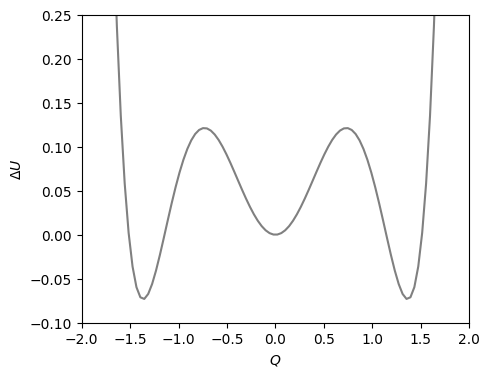

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

## Pseudocode outline:

1. Define the constants
2. Use the potential energy function defined above and find the second derivative
3. Define the equation of motion
4. Solve the differential equation of motion
5. Get period
6. Convert to angular amplitude
7. Plot angular amplitude vs. initial displacement

## Expanded pseudocode:

1. k = 1; d = 2.4; phi = 1, m = 1
2. Input: Initial displacement; Output: The second derivative; Test by checking at Q = 0, the value of the function is K
3. Input: initial displacement and time; Output: time and displacement array
4. Find zeroes using root finding algorithms, peak finding, and extrapolation; Input: displacement array; Output: times where displacement is zero
5. Input: times where displacement is zero; Output: Period
6. Input: Period; Output: angular frequency
7. Just plot it

In [2]:
# Define the constants

k = 1
d = 2.4
phi = 1
m = 1

In [3]:
# Second derivative function

def sec_deriv_potential_energy(q):
    return k - 3 * d * q ** 2 + 5 * phi * q ** 4

sec_deriv_potential_energy(0)

1.0

In [4]:
# Solve differential equation

def solve_diff_eq(q0):
    dt = 20 / 1000
    q = np.zeros(1000)
    q[0] = q0
    v = 0

    for t in range(1, 1000):
        force = -sec_deriv_potential_energy(q[t-1])  # F = -dU/dQ
        a = force / m
        v += a * dt
        q[t] = q[t - 1] + v * dt
    return np.linspace(0, 20, 1000), q


In [9]:
# Find period

def period(t, q):
    peak = 0
    root = 0
    for i in range(1, len(t)- 1):
        if q[i - 1] < q[i] and q[i + 1] < q[i]:
            peak = t[i]
            break
    for i in range(1, len(t) - 1):
        if q[i - 1] / np.abs(q[i - 1]) != q[i + 1] / np.abs(q[i + 1]):
            zero = t[i]
            break
    return np.abs(root - peak) * 4

In [10]:
def ang_freq(p):
    return 2 * np.pi / p

In [11]:
def plot(q_vals):
    freq = []
    for q in q_vals:
        t, qq = solve_diff_eq(q)
        p = period(t, qq)
        freq.append(ang_freq(p))

    plt.plot(q_vals, freq)
    plt.xlabel('Initial Displacement')
    plt.ylabel('Angular Frequency')
    plt.title('Initial Displacement vs Angular Frequency')
    plt.grid(True)
    plt.legend()
    plt.show()

/tmp/ipykernel_20834/4288321020.py:4: RuntimeWarning: overflow encountered in scalar power
  return k - 3 * d * q ** 2 + 5 * phi * q ** 4
/tmp/ipykernel_20834/4288321020.py:4: RuntimeWarning: invalid value encountered in scalar add
  return k - 3 * d * q ** 2 + 5 * phi * q ** 4
/tmp/ipykernel_20834/608227919.py:2: RuntimeWarning: divide by zero encountered in divide
  return 2 * np.pi / p
/tmp/ipykernel_20834/3214611571.py:11: RuntimeWarning: invalid value encountered in scalar divide
  if q[i - 1] / np.abs(q[i - 1]) != q[i + 1] / np.abs(q[i + 1]):
/tmp/ipykernel_20834/1387905733.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


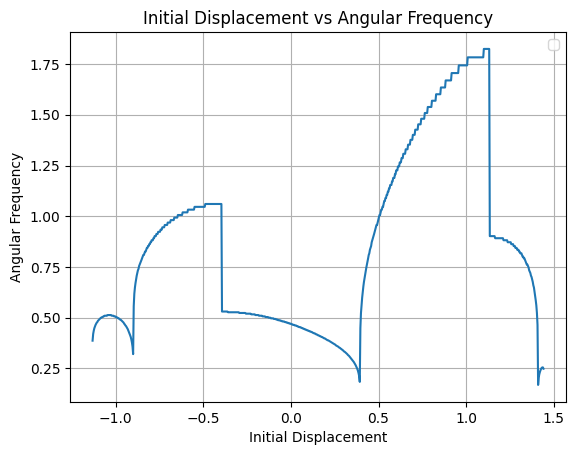

In [13]:
q_vals = np.linspace(-1.7, 1.7, 1000)
plot(q_vals)